## **Prediction using decision tree algorithm**



### **Decision tree**
before we start we should know first what is the decision tree algorithm. \

**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

and you can understand this definision by this image.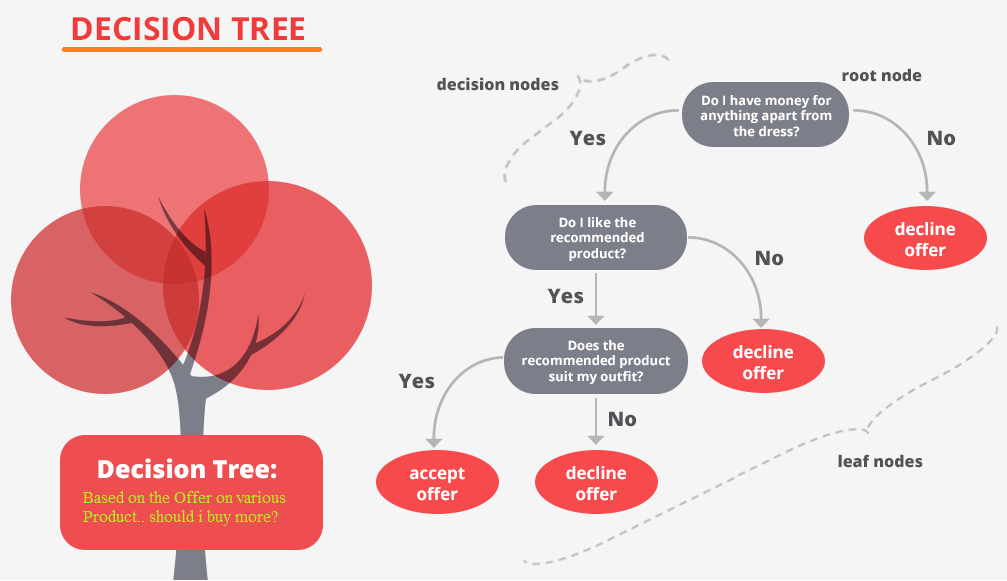

You can notice that Decision tree consist of three nodes: \
**1. Root node:** The very top node that represents the entire population or sample. \

**2. Decision nodes:** Sub-nodes that split from the root node. \

**3. Leaf nodes:** Nodes with no children, also known as terminal nodes. \

Refer to below image for more visual representation.
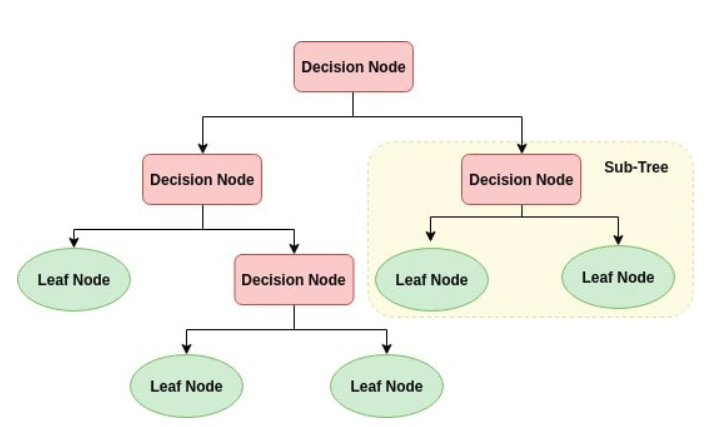

### **How decision trees work**
Decision trees work in a step-wise manner, meaning that they perform a step-by-step process instead of following a continuous process. Decision trees follow a tree-like structure, where the nodes of a tree are split using the features based on defined criteria. **The main criteria based on which decision trees split are:**

**Gini impurity :** Measures the impurity in a node.

**Entropy :** Measures the randomness of the system.

**Variance :** This is normally used in the Regression model, which is a measure of the variation of each data point from the mean.

### **Implementation of Decision tree**
We will use the scikit-learn library to build the decision tree model. We will be using the iris dataset to build a decision tree classifier. The data set contains information of 3 classes of the iris plant with the following\
**attributes:** - sepal length - sepal width - petal length - petal width.

**class:** Iris Setosa, Iris Versicolour, Iris Virginica

**The task** is to predict the class of the iris plant based on the attributes.

#### **Import libraries**

In [2]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.model_selection import train_test_split

### **Loading dataset**

In [6]:
# Load dataset 
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

### **Exploratory Data Analysis**

In [7]:
#shape
dataset.shape

(150, 5)

In [8]:
#head
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#description
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# class distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

**Note :** from class distribution you can see that the dataset is balanced.

### **Visualization**
some graphical representation of information and data.

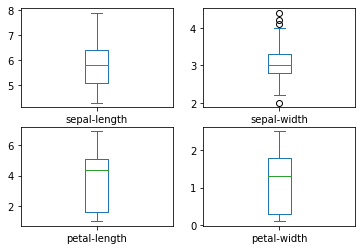

In [12]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

You can notice that there are **outliers** in sepal-width feature

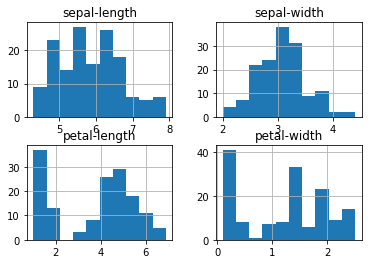

In [13]:
# histograms
dataset.hist()
plt.show()

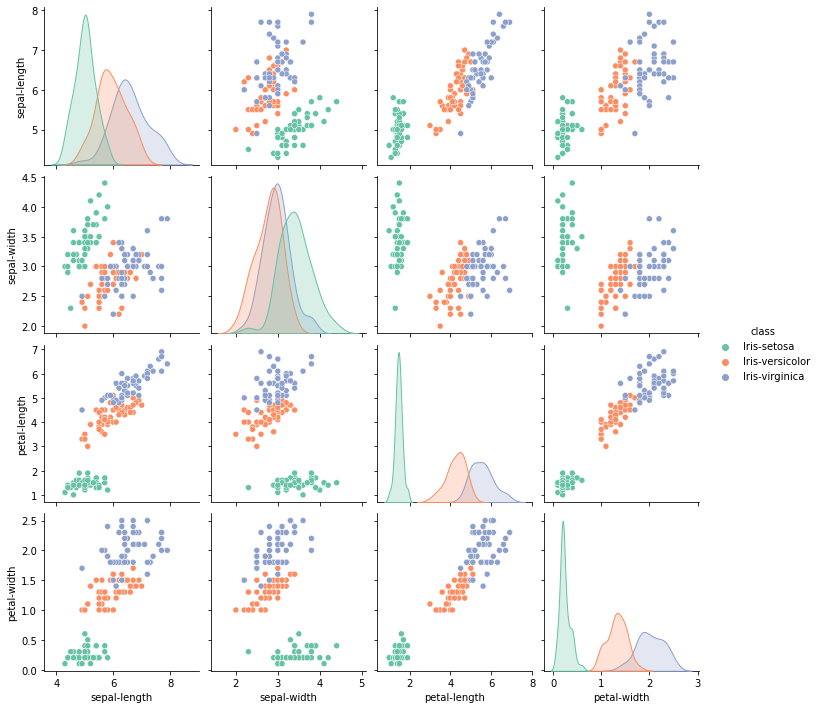

In [14]:
# pair plot
sns.pairplot(data=dataset,hue="class",palette="Set2")
plt.show()

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

We see that iris-setosa is easily separable from the other two. Especially when we can see in different colors for corresponding Labels like above. \

But our mission was finding the Labels that we didn't knew at all, So Let's create a suitable scenario.

### **Prepare Train and Test**

In [15]:
#create arrays of observations and labels
X = dataset.drop('class', axis=1).values
y = dataset['class'].values

In [16]:
#reshape y
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [17]:
# Split-out test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1, stratify=y)
print('dataset is splitted.')

### **Create the model & predict**

In [18]:
# Creating Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
accuracy is 0.9777777777777777


### **Visualize the Decision Tree.**

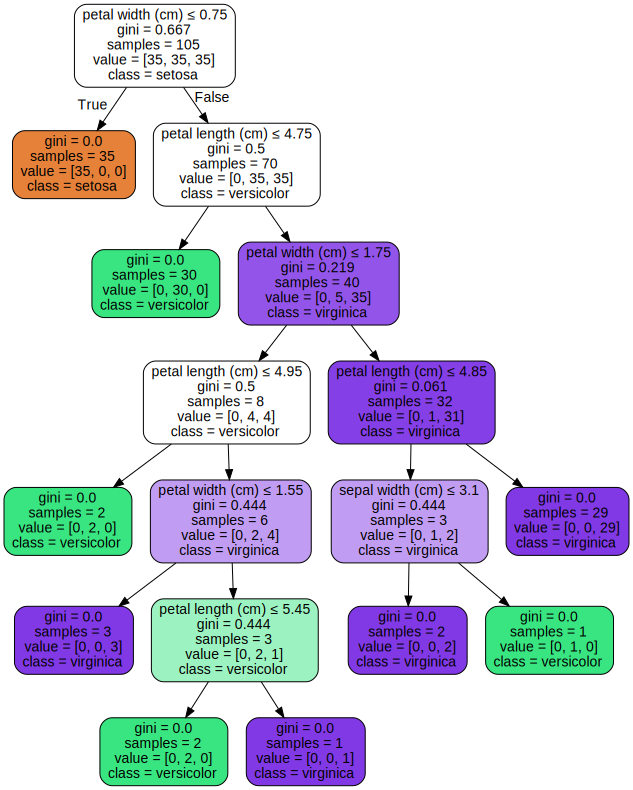

In [32]:
import sklearn.datasets as datasets
iris = datasets.load_iris()
# Visualize the graph
dot_data = export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### **References**

[https://scikit-learn.org/](https://scikit-learn.org/stable/modules/tree.html)\
[how-to-build-a-decision-tree-with-the-iris-dataset-in-python](https://www.educative.io/edpresso/how-to-build-a-decision-tree-with-the-iris-dataset-in-python)\
[Understanding Decision Trees with Python](https://datascience.foundation/sciencewhitepaper/understanding-decision-trees-with-python)\
[top-machine-learning-algorithms-beginner#8--Machine-Learning-Algorithms](https://www.kaggle.com/code/marcovasquez/top-machine-learning-algorithms-beginner#8--Machine-Learning-Algorithms)